# Media pipe preprocess face
Usage example of MediaPipe Face Mesh Solution API in Python (see also http://solutions.mediapipe.dev/face_mesh).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cchantra/Tsinghua_preprocess/blob/master/mediapipe_preprocess.ipynb)

Install media pipe package by

!pip install mediapipe

Try Upload any image that contains face(s) to the Colab.  

In [2]:
#for googoe colab upload image for test
from google.colab import files
uploaded = files.upload()

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [3]:
def resize_image(img,scale_percent=60):

    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [3]:
import cv2

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

O08M


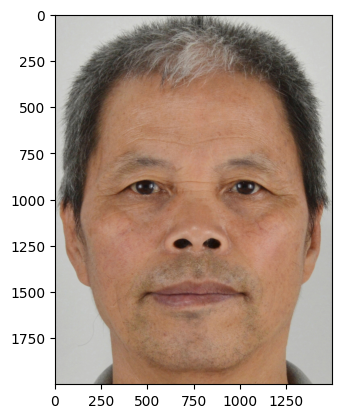

In [10]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
 
images = {'O08M': cv2.imread('./O08M.jpg')}
for name, image in images.items():
  print(name)   
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = resize_image(image)
  plt.imshow(image)
 

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as `mp_face_mesh = mp.solutions.face_mesh`.

You may change the parameters, such as `static_image_mode`, `max_num_faces`, and `min_detection_confidence`, during the initialization. Run `help(mp_face_mesh.FaceMesh)` to get more informations about the parameters.

In [11]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Face Mesh.
 |  
 |  MediaPipe Face Mesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Face Mesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and

In [21]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=3, color=(0,255,255), circle_radius=2)


Face landmarks of O08M:


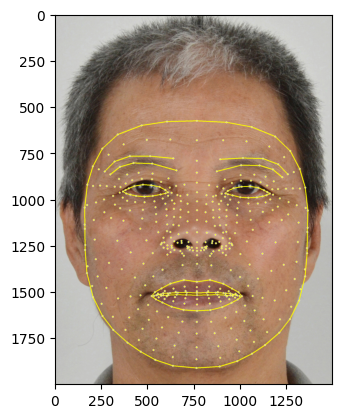

In [22]:
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2,
    min_detection_confidence=0.7) as face_mesh:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
   
    
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow( annotated_image)
 
    

In [23]:

face_landmarks = results.multi_face_landmarks[0]

item =face_landmarks.landmark[0] 
print(item.x, item.y, item.z)

0.5105252861976624 0.7235150337219238 -0.12384678423404694


In [24]:
for i in face_landmarks.landmark:
  print(i)

x: 0.5105252861976624
y: 0.7235150337219238
z: -0.12384678423404694

x: 0.5110042691230774
y: 0.616945207118988
z: -0.19966942071914673

x: 0.5108966827392578
y: 0.6516619324684143
z: -0.11323493719100952

x: 0.4796530604362488
y: 0.5351121425628662
z: -0.1376386433839798

x: 0.511074423789978
y: 0.5895107388496399
z: -0.20856380462646484

x: 0.5109638571739197
y: 0.5566677451133728
z: -0.18902325630187988

x: 0.5107508897781372
y: 0.481537401676178
z: -0.0755733922123909

x: 0.25655174255371094
y: 0.4850136339664459
z: 0.06886603683233261

x: 0.5102641582489014
y: 0.42891526222229004
z: -0.04072123393416405

x: 0.510391116142273
y: 0.39687633514404297
z: -0.04143469035625458

x: 0.5100627541542053
y: 0.2886749804019928
z: 0.023266302421689034

x: 0.5105378031730652
y: 0.7381988167762756
z: -0.11999914795160294

x: 0.5103586316108704
y: 0.7492035031318665
z: -0.10846047103404999

x: 0.5100727677345276
y: 0.7538173794746399
z: -0.09283894300460815

x: 0.5110617280006409
y: 0.75977110862

# mount files from google drive 


In [9]:
import cv2

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
source_dir = '../TsinghuaFEDImages'
dest_dir = '../TsinghuaFED_preprocess' # landmarks of each subject_emotion



In [5]:

IMG_HEIGHT = 224
IMG_WIDTH = 224
import glob, os
 
files = [  file for file in glob.glob(source_dir+"/*.jpg")]

  


In [ ]:

images_data = [ (name, cv2.resize(cv2.imread(name), (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)) for name in files]

In [4]:
preprocess_dir = dest_dir
preprocess_dir2 =  '../TsinghuaFEDimages_Depth' # landmarks of each subject_emotion


In [ ]:
import shutil
if not os.path.exists(preprocess_dir ):
  os.mkdir(preprocess_dir)
else:
  try:
    shutil.rmtree(preprocess_dir )
    os.mkdir(preprocess_dir)
  except:
    pass

In [6]:
import shutil
if not os.path.exists(preprocess_dir2 ):
  os.mkdir(preprocess_dir2)
else:
  try:
    shutil.rmtree(preprocess_dir2 )
    os.mkdir(preprocess_dir2)
  except:
    pass

In [15]:

for file in glob.glob(source_dir+"/*.jpg"):
  image = cv2.imread(file) 
  filepath, file_extension = os.path.splitext(file)

  filename = filepath.split('/')[-1] # take last item as filename w/o ext
  array = filename.split('_')
  #subject_name =   array[0]
  #emotion = array[1]
  print('process ',filename)
  filepath = dest_dir + '/'+filename+'_landmark.csv'
  f = open(filepath,'w')

  with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
   
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    face_landmarks = results.multi_face_landmarks[0] # one face per image

     
    for item in face_landmarks.landmark :
      #print(item.x, item.y, item.z)
      f.write('%.4f,%.4f,%.4f\n'%(item.x,item.y,item.z))
    f.close()
    



process  O49F-65_fear
process  O04F-76_content
process  O04F-76_happy
process  O04F-76_fear
process  O04F-76_disgust
process  O04F-76_anger
process  O04F-76_surprise
process  O04F-76_neutral
process  O04F-76_sad
process  O07F-65_disgust
process  O07F-65_anger
process  O07F-65_content
process  O07F-65_sad
process  O07F-65_neutral
process  O07F-65_fear
process  O07F-65_surprise
process  O07F-65_happy
process  O08M-65_neutral
process  O08M-65_fear
process  O08M-65_happy
process  O08M-65_content
process  O08M-65_disgust
process  O08M-65_anger
process  O08M-65_sad
process  O08M-65_surprise
process  O09F-64_content
process  O09F-64_anger
process  O09F-64_fear
process  O09F-64_disgust
process  O09F-64_happy
process  O09F-64_neutral
process  O10F-60_fear
process  O10F-60_disgust
process  O10F-60_anger
process  O10F-60_content
process  O09F-64_sad
process  O09F-64_surprise
process  O10F-60_happy
process  O10F-60_neutral
process  O10F-60_sad
process  O12M-64_disgust
process  O12M-64_happy
proces

In [25]:
def save_depth_fig(x,y,z,name):

  # target grid to interpolate to
  xi = yi = x,y
  xi,yi = np.meshgrid(xi,yi)

  # set mask
  #mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

  # interpolate
  zi = griddata((x,y),z,(xi,yi),method='nearest') # linear, cubic

  # mask out the field
  #zi[mask] = np.nan

  # plot
  fig = plt.figure()
  ax = fig.add_subplot(111)
  plt.contourf(xi,yi,zi,)
  plt.plot(x,y,'k.')
  plt.axis('off') 
   
  plt.savefig(name,dpi=100,transparent=True, bbox_inches = 'tight',
    pad_inches = 0)
  

# save depth images

In [36]:
source_dir = './TsinghuaFEDImages'
preprocess_dir2 = './TsinghuaFEDimages_Depth'

./TsinghuaFEDimages_Depth/Y31F-30_content_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_anger_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_content_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_disgust_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_fear_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_happy_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_neutral_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_sad_Depth.png
./TsinghuaFEDimages_Depth/O04F-76_surprise_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_anger_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_content_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_disgust_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_fear_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_happy_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_neutral_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_sad_Depth.png
./TsinghuaFEDimages_Depth/O07F-65_surprise_Depth.png
./TsinghuaFEDimages_Depth/O08M-65_anger_Depth.png
./TsinghuaFEDimages_Depth/O08M-65_content_Depth.png
./TsinghuaFEDimages_Depth/O08M-65_

/home/chantana/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


./TsinghuaFEDimages_Depth/O08M-65_happy_Depth.png
./TsinghuaFEDimages_Depth/O08M-65_neutral_Depth.png
./TsinghuaFEDimages_Depth/Y27M-23_sad_Depth.png
./TsinghuaFEDimages_Depth/Y27M-23_surprise_Depth.png


KeyboardInterrupt: 

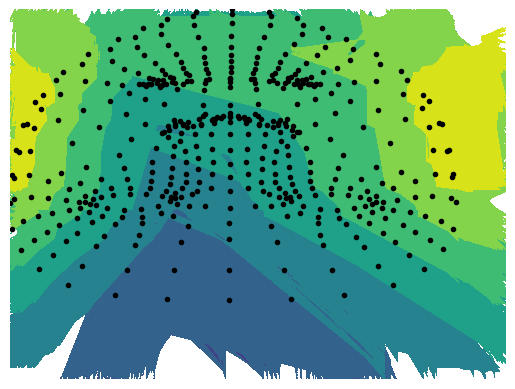

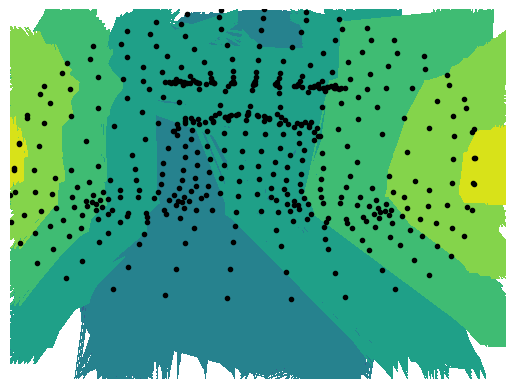

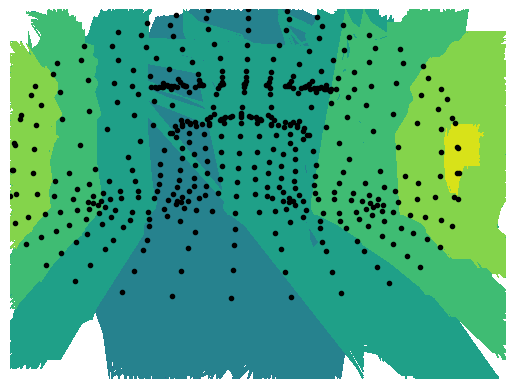

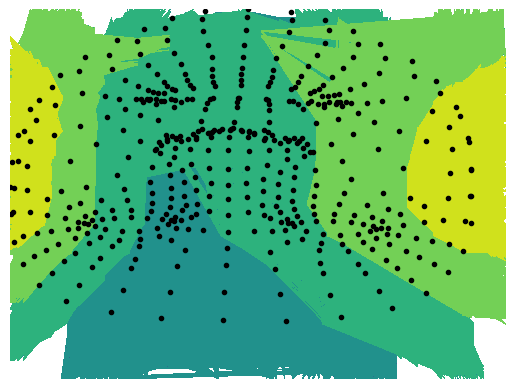

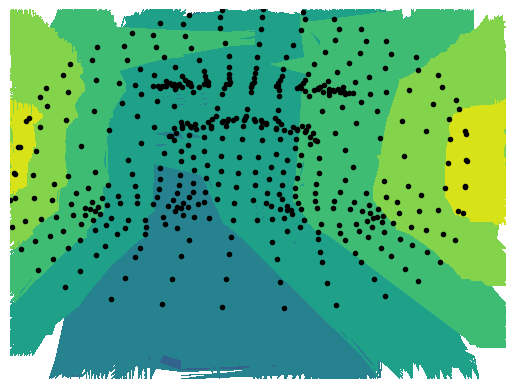

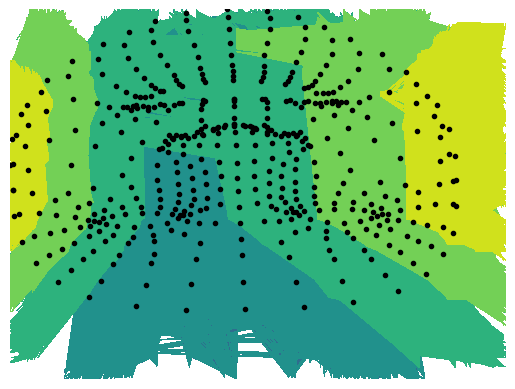

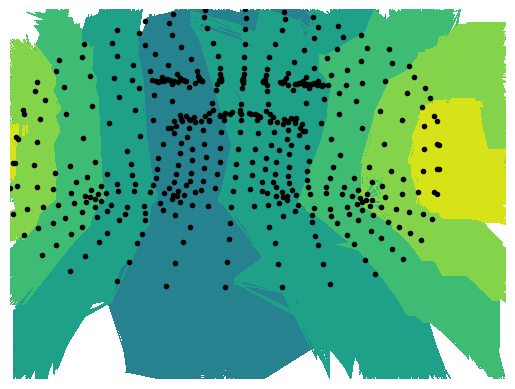

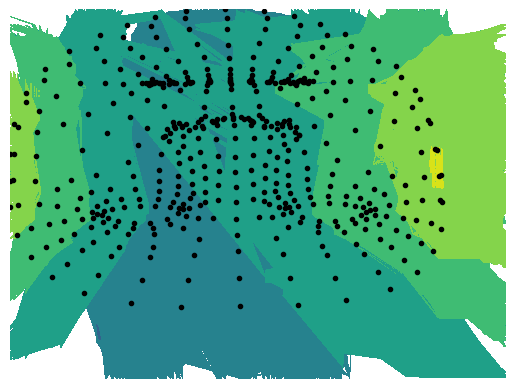

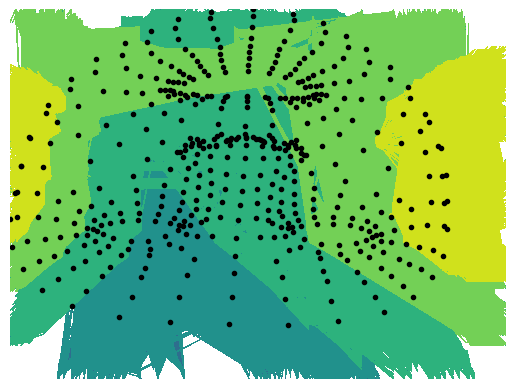

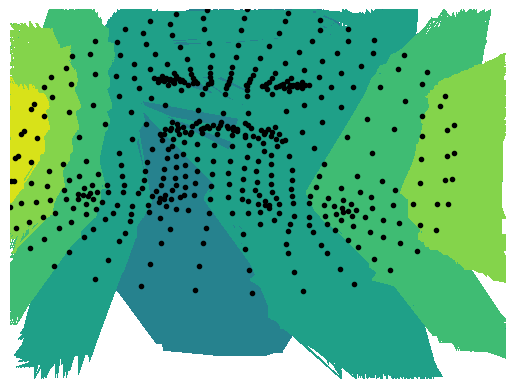

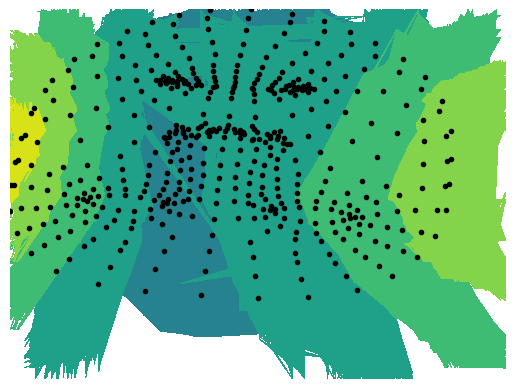

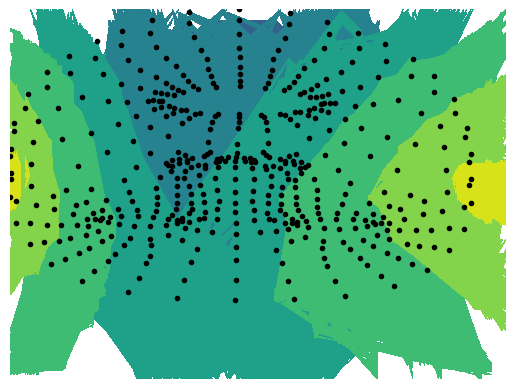

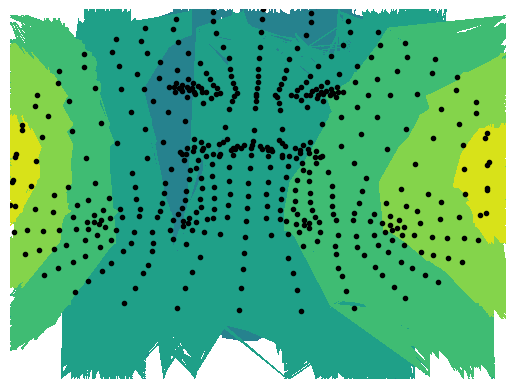

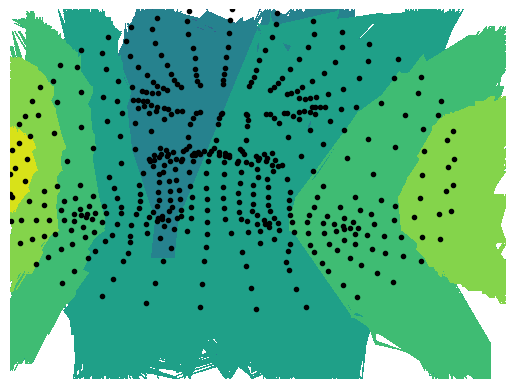

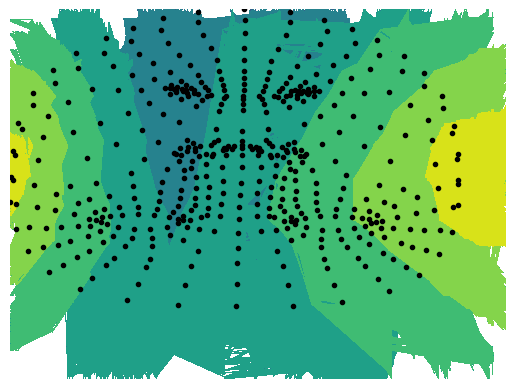

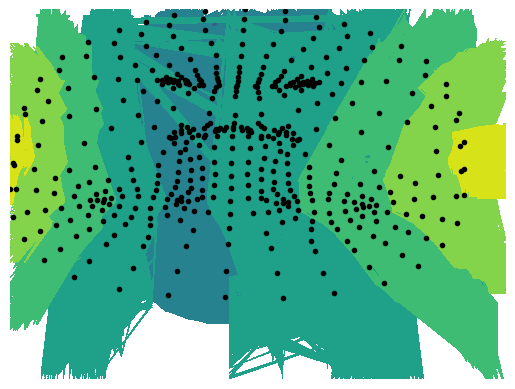

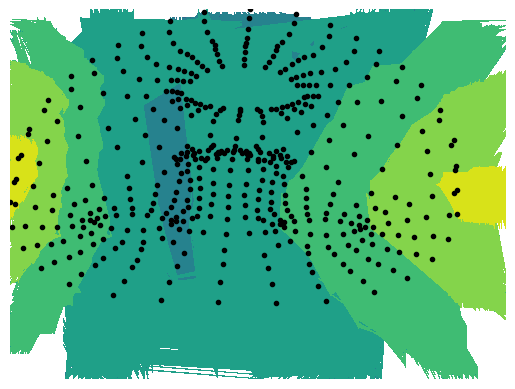

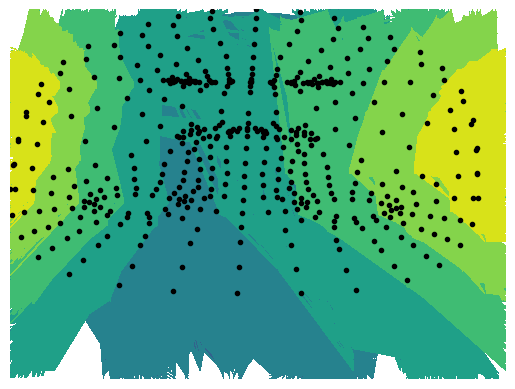

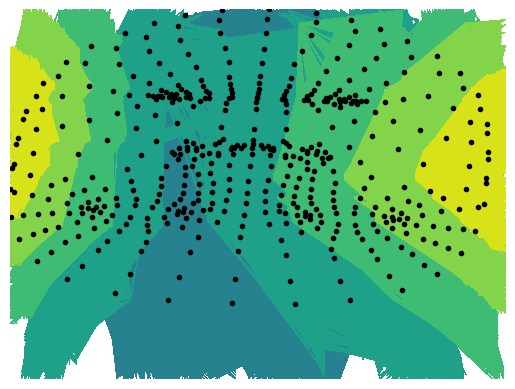

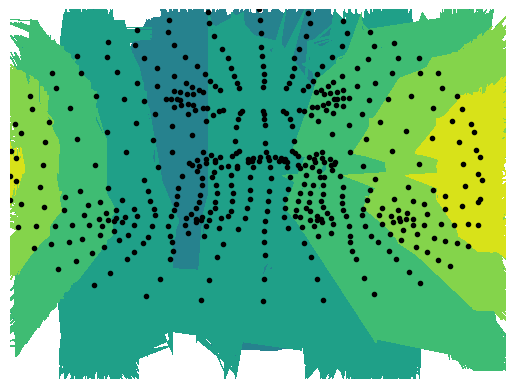

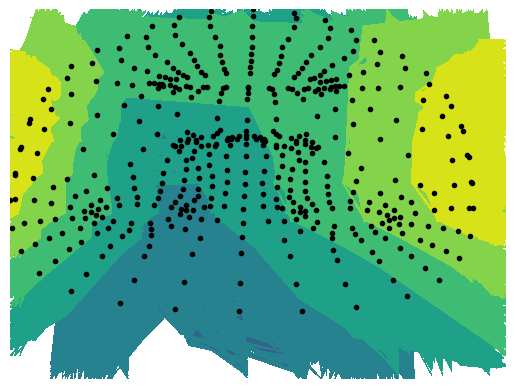

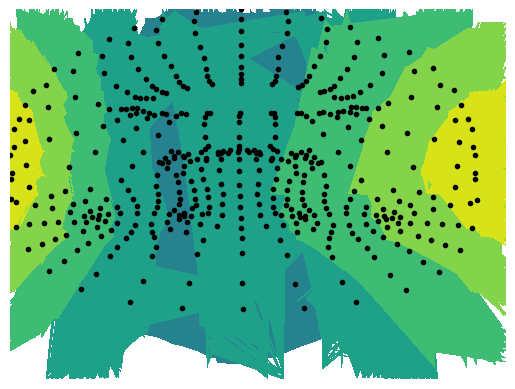

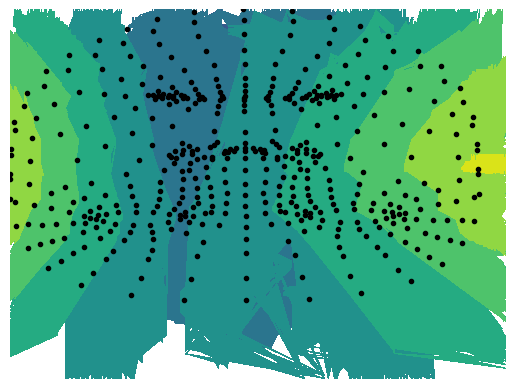

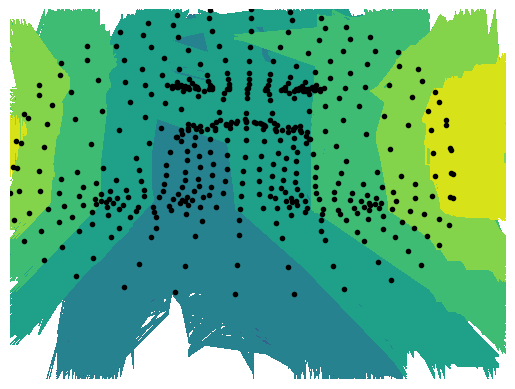

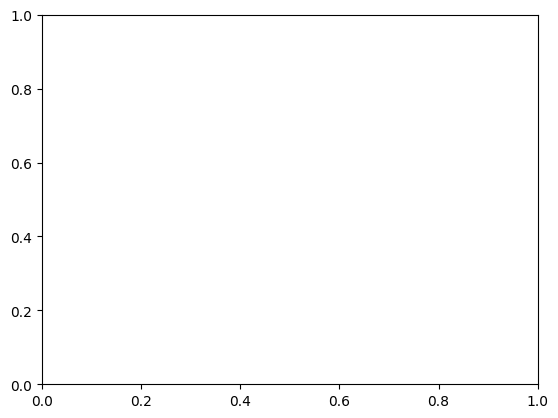

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import glob
import cv2
import os

def gen_depth(source_dir,dest_dir):

  for file in glob.glob(source_dir+"/*.jpg"):
    image = cv2.imread(file) 
    filepath, file_extension = os.path.splitext(file)

    filename = filepath.split('/')[-1] # take last item as filename w/o ext
    array = filename.split('_')
    #subject_name =   array[0]
    #emotion = array[1]
    #print('process ',filename)
    filepath = dest_dir + '/'+filename+'_Depth.png'
    f = open(filepath,'w')

    with mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=2,
      min_detection_confidence=0.5) as face_mesh:
    
      results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
      face_landmarks = results.multi_face_landmarks[0] # one face per image

      xi = []
      yi = []
      zi = []
      for item in face_landmarks.landmark :
        #print(item.x, item.y, item.z)
        xi.append(item.x)
        yi.append(item.y)
        zi.append(item.z)
      print(filepath)      
      save_depth_fig(xi,yi,zi,filepath)

gen_depth(source_dir,preprocess_dir2)

Face landmarks of ./TsinghuaFEDImages/O15M-69_surprise.jpg:
Face landmarks of ./TsinghuaFEDImages/O15M-69_happy.jpg:
Face landmarks of ./TsinghuaFEDImages/O15M-69_fear.jpg:


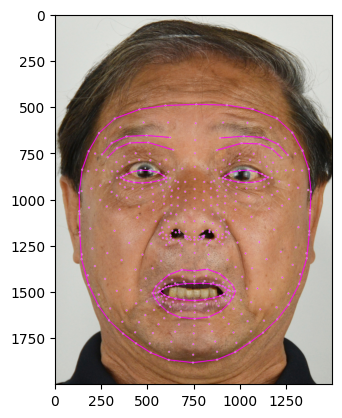

In [41]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=3, color=(255,0,255),circle_radius=2)

image_files = [source_dir+ '/O15M-69_surprise.jpg', source_dir+ '/O15M-69_happy.jpg', source_dir+ '/O15M-69_fear.jpg']

for image_file in image_files:
  # Run MediaPipe Face Mesh to see mesh
  with mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      min_detection_confidence=0.5) as face_mesh:
      
      image = cv2.imread(image_file)
      # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
      results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Draw face landmarks of each face.
      print(f'Face landmarks of {image_file}:')

      annotated_image = image.copy()
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec)
       
      annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
      plt.imshow( annotated_image)
 
    
      #cv2_imshow(annotated_image)

In [44]:
dest_dir = './TsinghuaFED_preprocess'
csv_files = [dest_dir+ '/O15M-69_surprise_landmark.csv', dest_dir+ '/O15M-69_happy_landmark.csv', dest_dir+ '/O15M-69_fear_landmark.csv']

for csv_file in csv_files:  
  f = open(csv_file,'r')
  content = f.read()
  lines = content.split('\n')
  data_all = []
  data = dict()
  data['x'], data['y'], data['z'] = [],[],[]
  for line in lines:
    d = line.split(',')
    if len(d) > 0 and d[0] != '':
      data['x'].append( float( d[0]))
      data['y'].append( float(d[1]))
      data['z'].append( float(d[2]))
  data_all.append(data)




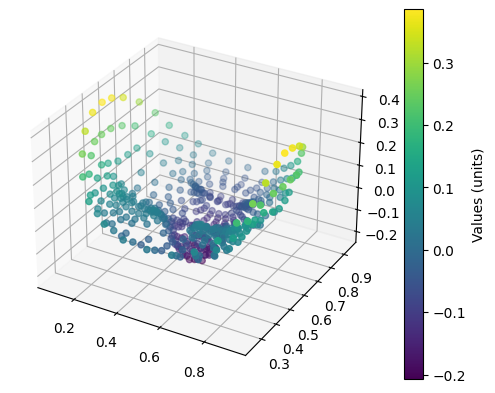

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = data_all[0]['x']
y = data_all[0]['y']
z = data_all[0]['z']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(x,y,z,c=z)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Values (units)")
plt.show()


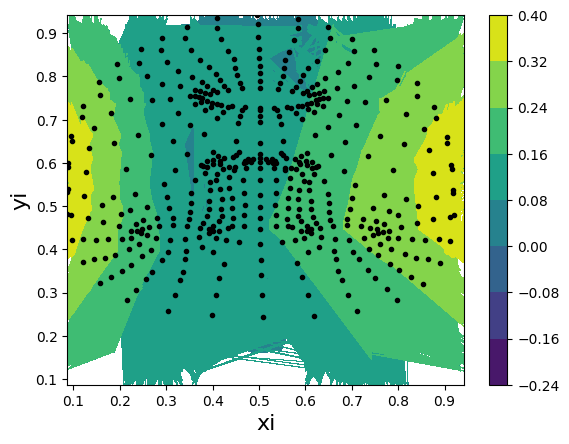

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata



# target grid to interpolate to
xi = yi = x,y
xi,yi = np.meshgrid(xi,yi)

# set mask
#mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='nearest') # linear, cubic

# mask out the field
#zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,)
plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.colorbar()
#plt.savefig('interpolated.png',dpi=100)
plt.show()

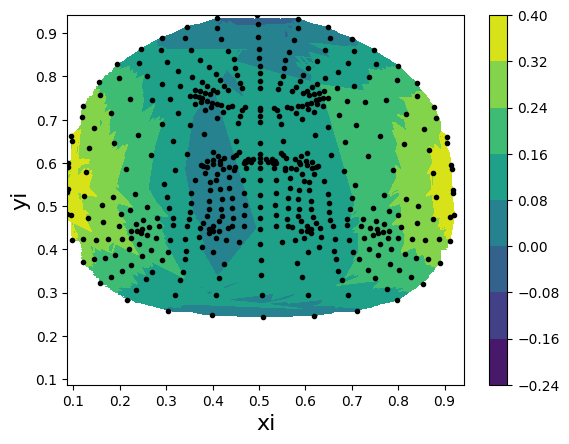

In [47]:
#mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)
xi = yi = data['x'],data['y']
xi,yi = np.meshgrid(xi,yi)
# interpolate
zi = griddata((data['x'],data['y']),data['z'],(xi,yi),method='linear') # linear, cubic

# mask out the field
#zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,)
plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.colorbar()
#plt.savefig('interpolated.png',dpi=100)
plt.show()

Face landmarks of ./TsinghuaFEDImages/O15M-69_surprise.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_happy.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_fear.jpg:
468


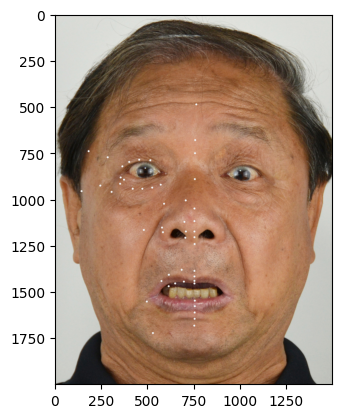

In [54]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=3, color=(255,255,255), circle_radius=2)

image_files = [source_dir+ '/O15M-69_surprise.jpg',source_dir+ '/O15M-69_happy.jpg', source_dir+ '/O15M-69_fear.jpg']

for image_file in image_files:
  # Run MediaPipe Face Mesh to see mesh
  with mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      min_detection_confidence=0.5) as face_mesh:
      
      image = cv2.imread(image_file)
      # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
      results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Draw face landmarks of each face.
      print(f'Face landmarks of {image_file}:')

      annotated_image = image.copy()
       
      for face_landmarks in results.multi_face_landmarks:
         
        all = face_landmarks.landmark
        # 1-6 middle line
        print(len(all))
        del face_landmarks.landmark[50:len(all)]
        #del face_landmarks.landmark[300:len(all)]  
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks ,
            #connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec)
       
             #landmark_drawing_spec=drawing_spec)
      annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
      plt.imshow( annotated_image)
        
       
       

Face landmarks of ./TsinghuaFEDImages/O15M-69_surprise.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_happy.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_fear.jpg:
468


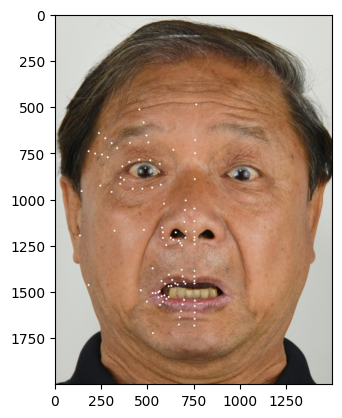

In [56]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=3, color=(255,255,255), circle_radius=2)

image_files = [source_dir+ '/O15M-69_surprise.jpg',source_dir+ '/O15M-69_happy.jpg', source_dir+ '/O15M-69_fear.jpg']

for image_file in image_files:
  # Run MediaPipe Face Mesh to see mesh
  with mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      min_detection_confidence=0.5) as face_mesh:
      
      image = cv2.imread(image_file)
      # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
      results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Draw face landmarks of each face.
      print(f'Face landmarks of {image_file}:')

      annotated_image = image.copy()
       
      for face_landmarks in results.multi_face_landmarks:
         
        all = face_landmarks.landmark
        # 1-6 middle line
        print(len(all))
        del face_landmarks.landmark[100:len(all)]
        #del face_landmarks.landmark[300:len(all)]  
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            #connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec)
      annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
      plt.imshow( annotated_image)
        
       

Face landmarks of ./TsinghuaFEDImages/O15M-69_surprise.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_happy.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_fear.jpg:
468


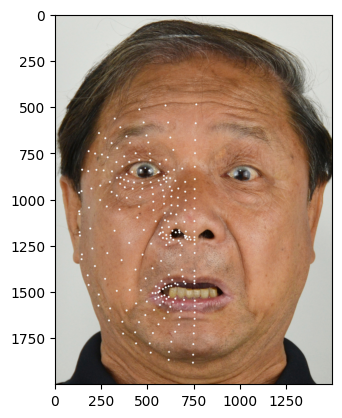

In [57]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=3, color=(255,255,255), circle_radius=2)

image_files = [source_dir+ '/O15M-69_surprise.jpg',source_dir+ '/O15M-69_happy.jpg', source_dir+ '/O15M-69_fear.jpg']

for image_file in image_files:
  # Run MediaPipe Face Mesh to see mesh
  with mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      min_detection_confidence=0.5) as face_mesh:
      
      image = cv2.imread(image_file)
      # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
      results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Draw face landmarks of each face.
      print(f'Face landmarks of {image_file}:')

      annotated_image = image.copy()
       
      for face_landmarks in results.multi_face_landmarks:
         
        all = face_landmarks.landmark
        # 1-6 middle line
        print(len(all))
        del face_landmarks.landmark[245:len(all)]
        #del face_landmarks.landmark[300:len(all)]  
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks ,
            #connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec)
      annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
      plt.imshow( annotated_image)
      

Face landmarks of ./TsinghuaFEDImages/O15M-69_surprise.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_happy.jpg:
468
Face landmarks of ./TsinghuaFEDImages/O15M-69_fear.jpg:
468


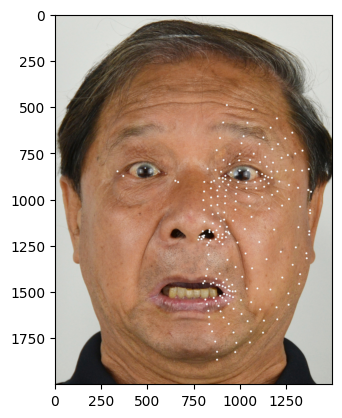

In [59]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness= 3, color=(255,255,255),circle_radius=2)

image_files = [source_dir+ '/O15M-69_surprise.jpg',source_dir+ '/O15M-69_happy.jpg', source_dir+ '/O15M-69_fear.jpg']

for image_file in image_files:
  # Run MediaPipe Face Mesh to see mesh
  with mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      min_detection_confidence=0.5) as face_mesh:
      
      image = cv2.imread(image_file)
      # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
      results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Draw face landmarks of each face.
      print(f'Face landmarks of {image_file}:')

      annotated_image = image.copy()
       
      for face_landmarks in results.multi_face_landmarks:
         
        all = face_landmarks.landmark
        # 1-6 middle line
        print(len(all))
        del face_landmarks.landmark[0:244]
        #del face_landmarks.landmark[300:len(all)]  
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks ,
            #connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec)
             
      annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
      plt.imshow( annotated_image)
      

In [ ]:
#Try : find out which elements are which parts of face


In [ ]:
# Try : extract face geometry and find out face mesh surface on each portion of face